In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import odeint
from matplotlib import gridspec
import time
from ipywidgets import widgets

In [2]:
#Definimos las ecuaciones diferenciales planteadas en el enunciado
def F(y,a,b):
    return np.array([-b*y[0]*y[1],b*y[0]*y[1] - a*y[1],a*y[1]])
    
#resolvemos el problema con el metodo de euler, pasandole un initial guess y2 y los valores de alpha y beta.
def solve_SIR(y2,a,b):
    xi = [763,y2,0]
    #discretizamos el espacio en 200 puntos de 0 a 14, ya que conocemos los valores en ese extremo.
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        #definimos un h pequeño, el cual sera los espacios entre punto y punto de nuestra discretización.
        h = time_grid[i+1] - time_grid[i]
        #actualizamos el vector con el metodo de euler.
        xi = xi + h*F(xi,a,b)
    #retornamos el valor de I(t) en 14.    
    return xi[1]

In [3]:
#Probamos nuestro algoritmo
initial_guess = 10

solx = solve_SIR(initial_guess,0.4477,0.0022)
print("Valor de I(14) sin aplicar busqueda de 0:")
print(solx)
print("\n")

#Definimos la funcion a la cual le aplicaremos la busqueda de 0 con broyden.
def g(x):
    return(solve_SIR(x,0.4477,0.0022) - 23)

x1 = scipy.optimize.broyden2(g,initial_guess)
print("Valor de I(14) aplicando busqueda de 0:")
print(x1)

Valor de I(14) sin aplicar busqueda de 0:
10.6190505186


Valor de I(14) aplicando busqueda de 0:
1.1695173865745745


In [5]:
def solve_SIR_graphic(y2,a,b):
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,y2,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F(xi,a,b)
        
    #Por si se desea imprimir los valores de S,I,R:
    
    #print("S(14):")
    #print(y_1[len(y_1)-1])
    #print("\n")
    #print("I(14):")
    #print(y_2[len(y_2)-1])
    #print("\n")
    #print("R(14):")
    #print(y_3[len(y_3)-1])
    #print("\n")
    
    fig = plt.figure(figsize=(12, 6)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.hold(True)
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.hold(True)
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion",fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("tiempo", fontsize = 14)
    plt.ylabel("población", fontsize = 14)

    plt.tight_layout()
    plt.show()

Initial guess luego de la busqueda de 0:
1.1695173865745745




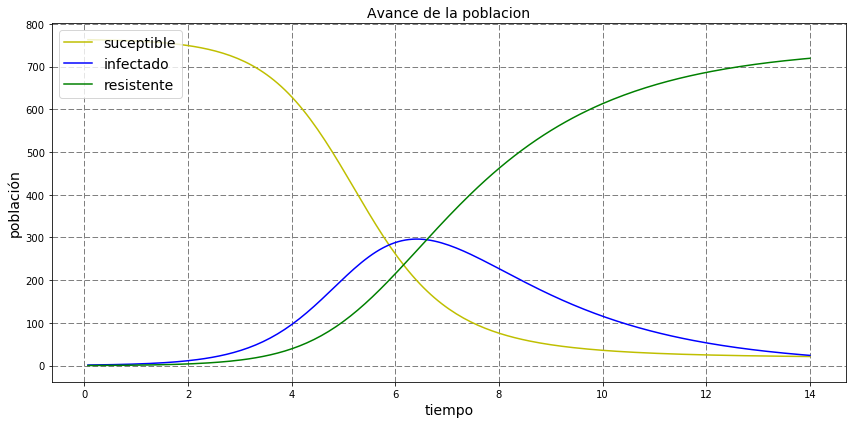

In [6]:
print("Initial guess luego de la busqueda de 0:")
print(x1)
print("\n")
solve_SIR_graphic(x1,0.4477,0.0022)

In [8]:
def diferent_a_graphic(a):    
    
    initial_guess = 1

    solx = solve_SIR(initial_guess,a,0.0022)
    
    def g3(x):
        return(solve_SIR(x,a,0.0022) - 21)

    x1 = scipy.optimize.broyden2(g3,initial_guess)
    x = []
    y_1 = []
    y_2 = []
    y_3 = []
    xi = np.array([763,x1,0])
    eje_x = 0
    time_grid = np.linspace(0,14,200)
    for i in range(len(time_grid)-1):
        h = time_grid[i+1] - time_grid[i]
        eje_x = eje_x + h
        x.append(eje_x)
        y_1.append(xi[0])
        y_2.append(xi[1])
        y_3.append(xi[2])
        xi = xi + h*F(xi,a,0.0022)
    
    fig = plt.figure(figsize=(14, 7)) 
    plt.plot(x, y_1,'-y' ,label = 'suceptible')
    plt.plot(x, y_2,'-b', label = 'infectado')
    plt.plot(x, y_3,'-g', label = 'resistente')
    plt.grid(True)
    plt.grid(color = '0.5', linestyle = '--', linewidth = 1)
    plt.title("Avance de la poblacion con a = " + str(a),fontsize = 14, verticalalignment = 'baseline', horizontalalignment = 'center')
    plt.axis('tight')
    plt.legend(loc = 2,prop={'size':14})
    plt.xlabel("tiempo", fontsize = 14)
    plt.ylabel("población", fontsize = 14)

dp = 0.03
widgets.interact(diferent_a_graphic,a=(0.4477,0.8888,dp))

<function __main__.diferent_a_graphic>